In [468]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Gather data

In [469]:
# Read provided WeRateDogs twitter archive 
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding="utf-8")

In [470]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [471]:
# Programmatic import and saving of image prediction data 
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

open('image_prediction.tsv', 'wb').write(response.content)

335079

In [472]:
# load the file image_prediction.tsv (contains tweet image predictions 
# about breed of dog or other info in the tweet)
df_predictions = pd.read_csv('image_prediction.tsv', sep='\t')
df_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [443]:
#oAuth key info from Twitter to use tweepy, info is masked
#to safe-guard the sensitive info
consumer_key = 'MASKED'
consumer_secret = 'MASKED'
access_token = 'MASKED'
access_token_secret = 'MASKED'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#tweet status
tweet = api.get_status(df_twitter_archive.tweet_id[7], tweet_mode='extended')

In [473]:
#create tweet_json.txt file
file = 'tweet_json.txt'
if not os.path.isfile(file):
    open(file, 'w', encoding = 'UTF-8')

In [474]:
#generate tweet id list
tweet_ids = df_twitter_archive.tweet_id.values

In [475]:
err_tweets = []

print("Start getting tweets")

#write JSON to .txt file
with open('tweet_json.txt', 'w', encoding = 'UTF-8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump(tweet._json, file)
            file.write('\n')
        except Exception as e:
            print("Error in Tweet ID:", tweet_id)
            err_tweets.append(tweet_id)

#To indicate the all the tweets are processed
print("DONE getting tweets")


Start getting tweets
Error in Tweet ID: 888202515573088257
Error in Tweet ID: 873697596434513921
Error in Tweet ID: 872668790621863937
Error in Tweet ID: 872261713294495745
Error in Tweet ID: 869988702071779329
Rate limit reached. Sleeping for: 679
Error in Tweet ID: 866816280283807744
Error in Tweet ID: 861769973181624320
Error in Tweet ID: 856602993587888130
Error in Tweet ID: 851953902622658560
Error in Tweet ID: 845459076796616705
Error in Tweet ID: 844704788403113984
Error in Tweet ID: 842892208864923648
Error in Tweet ID: 837366284874571778
Error in Tweet ID: 837012587749474308
Error in Tweet ID: 829374341691346946
Error in Tweet ID: 827228250799742977
Error in Tweet ID: 812747805718642688
Error in Tweet ID: 802247111496568832
Error in Tweet ID: 779123168116150273
Error in Tweet ID: 775096608509886464
Error in Tweet ID: 771004394259247104
Error in Tweet ID: 770743923962707968
Error in Tweet ID: 759566828574212096
Error in Tweet ID: 754011816964026368
Rate limit reached. Sleeping 

In [476]:
# convert the JSON data to dataframe
tweets_list = []
with open('tweet_json.txt') as json_file:
    for line in json_file:
        tweets_dict = {}
        json_data = json.loads(line)
        tweets_dict['tweet_id'] = json_data['id']
        tweets_dict['retweet_count'] = json_data['retweet_count']
        tweets_dict['favorite_count'] = json_data['favorite_count']
        tweets_dict['source_tweet'] = json_data['source']
        tweets_dict['user'] = json_data['user']
        tweets_list.append(tweets_dict)

df_tweet_info = pd.DataFrame(tweets_list)

In [477]:
df_tweet_info.head()

,favorite_count,retweet_count,source_tweet,tweet_id,user
0,34734,7265,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,30100,5437,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,22653,3584,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,38012,7468,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,36288,8021,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Assessing Data

#### Assessing twitter archive data

In [478]:
#gater info about archive data fields
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [479]:
#see if there is any missing data in twitter archive
df_twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [480]:
# look out for any duplicates in twitter archive
df_twitter_archive.duplicated().sum()

0

In [481]:
#descriptive for twitter archive
df_twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [482]:
#visual inspection of df_twitter_archive data 
#(uncomment the following line to inspect the data)
# or the visual inspection can be done at 
# source file : twitter-archive-enhanced.csv

#df_twitter_archive

In [483]:
# Assess the 'name' column in twitter archive
df_twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Lola          10
Penny         10
Tucker        10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
Daisy          7
Toby           7
Bailey         7
an             7
Jax            6
Bella          6
Rusty          6
Scout          6
Dave           6
Stanley        6
Koda           6
Leo            6
Oscar          6
Milo           6
Jack           6
Sunny          5
            ... 
Nida           1
Aqua           1
Gustaf         1
Rinna          1
Crouton        1
Ozzie          1
Vince          1
Tater          1
Charl          1
Taco           1
Karl           1
Edd            1
Alejandro      1
Ronnie         1
Stuart         1
Severus        1
Gabby          1
Rolf           1
Horace         1
Julius         1
Shelby         1
Link           1
Saydee         1
Juckson        1
Ulysses        1
Beckham        1
Rumpole        1
Dex           

In [484]:
#peek at rating_numerator
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [485]:
#gather descriptive stats for rating_numerator
df_twitter_archive.rating_numerator.describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [486]:
#peek at rating_denomiator
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [487]:
#descriptive stats about rating_denominator 
df_twitter_archive.rating_denominator.describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [488]:
#info about source column
df_twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [489]:
#verify if classification of dogs is OK
df_twitter_archive.doggo.shape

(2356,)

In [490]:
df_twitter_archive[(df_twitter_archive['doggo'] != 'None') &
                   (df_twitter_archive['floofer'] != 'None')].shape

(1, 17)

In [491]:
df_twitter_archive[(df_twitter_archive['doggo'] != 'None') &
                   (df_twitter_archive['pupper'] != 'None')].shape

(12, 17)

In [492]:
df_twitter_archive[(df_twitter_archive['doggo'] != 'None') &
                   (df_twitter_archive['puppo'] != 'None')].shape

(1, 17)

In [493]:
df_twitter_archive[(df_twitter_archive['floofer'] != 'None') &
                   (df_twitter_archive['puppo'] != 'None')].shape

(0, 17)

In [494]:
df_twitter_archive[(df_twitter_archive['floofer'] != 'None') &
                   (df_twitter_archive['pupper'] != 'None')].shape

(0, 17)

In [495]:
df_twitter_archive[(df_twitter_archive['pupper'] != 'None') &
                   (df_twitter_archive['puppo'] != 'None')].shape

(0, 17)

#### Assessing Prediction data

In [496]:
#Find out any missing prediction data
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [497]:
#find if there are any duplicate rows in prediction data
df_predictions.duplicated().sum()

0

In [498]:
# descriptive statistics for predictions
df_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Assessing tweet information

In [499]:
#initial assessment if there is any missing data
df_tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
source_tweet      2331 non-null object
tweet_id          2331 non-null int64
user              2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [500]:
#any duplicate data?
df_tweet_info.tweet_id.duplicated().sum()

0

### Observations about assessed information

**twitter archive**

* Several columns for this data have missing info
  1. in_reply_to_status_id (clean)
  2. in_reply_to_user_id   (clean)
  3. retweeted_status_id   (clean)
  4. retweeted_status_user_id  (clean)
  5. expanded_urls         (clean)

* several columns have 'None' value  (clean)
* some of the rows in expanded_url have reference to different urls separated by commas (tidiness)
* 'text' column has a combo of description , ratings and shortened urls (tidiness)
* Some of the values in 'name' column start with lower-case and also contain inappropriate values for 'name' (such as : 'a', 'an', 'quite' etc.) (clean)
* dog types (i.e., doggo, floofer, puppoer and puppo) can be be combined into one column (tidiness)
* Some of the rows have classified the dogs into two types (e.g., same row has value both in doggo and floofer columns) - (tidiness)

**image prediction**
* some of the names in predictions table are lower-case (clean)

** **
* df_tweet_info, df_predictions and df_twitter_archive can be merged as they are related (based on tweet_id)
     

### Cleaning the data

#### Define

1. Drop the unused columns from archive data (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp)


In [501]:
#make a copy of dataframe before commencing the clean

df_arch_clean = df_twitter_archive.copy()

In [502]:
# Remove the unnecessary columns from archive
df_arch_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 
                    'retweeted_status_id', 'retweeted_status_user_id',
                    'retweeted_status_timestamp'], axis=1, inplace=True)

In [503]:
df_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [504]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Define
  Remove HTML portion from 'source' column

In [505]:
#Gather unique source values and also a chance to peek at the full value 
#in the column
df_arch_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [506]:
#Retain only the text value removing the anchor tags for each unique value
df_arch_clean.source = df_arch_clean['source'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_arch_clean.source = df_arch_clean['source'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_arch_clean.source = df_arch_clean['source'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_arch_clean.source = df_arch_clean['source'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [507]:
#Verify source column is cleaned up (i.e., not HTML tags)
df_arch_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Define
Drop the records with No corresponding images (i.e., expanded url is null)

In [508]:
df_arch_clean.expanded_urls.isnull().sum()

59

In [509]:
#Retain only those rows that have value in expanded_urls column
df_arch_clean = df_arch_clean[df_arch_clean['expanded_urls'].notnull()]

In [510]:
#Rows with no value for expanded_columns should have dropped
df_arch_clean.expanded_urls.isna().sum()

0

### Define
Clean-up the name column in twitter archive

In [511]:
# Use a regular expression to find name entries that are uppercase
df_arch_clean['name'] = df_arch_clean.name.str.extract('\\b([A-Z]\\S*)\\b')

In [512]:
# Drop any remaining rows that contain None in the name column
df_arch_clean = df_arch_clean[df_arch_clean.name != 'None']

In [513]:
# Drop any remaining rows that contain NaN in the name column
df_arch_clean.dropna(subset=['name'], inplace=True)

In [514]:
df_arch_clean.name.isna().sum()

0

In [515]:
df_arch_clean.name.value_counts()

Charlie     12
Lucy        11
Oliver      11
Cooper      11
Lola        10
Penny       10
Tucker      10
Bo           9
Winston      9
Sadie        8
Daisy        7
Toby         7
Buddy        7
Bailey       7
Jax          6
Koda         6
Dave         6
Stanley      6
Bella        6
Oscar        6
Leo          6
Scout        6
Jack         6
Milo         6
Rusty        6
Bentley      5
Gus          5
George       5
Phil         5
Sammy        5
            ..
Marty        1
Nida         1
Tripp        1
Gustaf       1
Rinna        1
Crouton      1
Ozzie        1
Vince        1
Lulu         1
Taco         1
Julius       1
Karl         1
Link         1
Severus      1
Ronnie       1
Rolf         1
Horace       1
Dex          1
Mo           1
Shelby       1
Julio        1
Saydee       1
Juckson      1
Ulysses      1
Beckham      1
Rufio        1
Flurpson     1
Cuddles      1
Edd          1
Gin          1
Name: name, Length: 931, dtype: int64

In [516]:
#extract short urls to a new column
df_arch_clean['tiny_url'] = df_arch_clean['text'].apply(lambda x : x.split()[-1])
df_arch_clean['text'] = df_arch_clean['text'].apply(lambda x: x[:-len(x.split()[-1])])

### Define
combine doggo, floofer, pupper and puppo columns into one column and drop the individual columns

In [517]:
df_arch_clean.loc[df_arch_clean['doggo'] == 'doggo', 'dog_class'] = 'doggo'
df_arch_clean.loc[df_arch_clean['floofer'] == 'floofer', 'dog_class'] = 'floofer'
df_arch_clean.loc[df_arch_clean['pupper'] == 'pupper', 'dog_class'] = 'pupper'
df_arch_clean.loc[df_arch_clean['puppo'] == 'puppo', 'dog_class'] = 'puppo'

In [518]:
#display a sample of 10-rows after combining the types into one column
df_arch_clean.sample(10)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tiny_url,dog_class
1911,674410619106390016,2015-12-09 02:09:56 +0000,Twitter for iPhone,This is Lenny. He wants to be a sprinkler. 10/...,https://twitter.com/dog_rates/status/674410619...,10,10,Lenny,None,None,None,None,https://t.co/CZ0YaB40Hn,NaN
516,810984652412424192,2016-12-19 23:06:23 +0000,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None,https://t.co/LouL5vdvxx,NaN
2291,667165590075940865,2015-11-19 02:20:46 +0000,Twitter for iPhone,This is Churlie. AKA Fetty Woof. Lost eye savi...,https://twitter.com/dog_rates/status/667165590...,10,10,Churlie,None,None,None,None,https://t.co/li2XYBVuAY,NaN
1967,673342308415348736,2015-12-06 03:24:51 +0000,Twitter for iPhone,This is Django. He's a skilled assassin pupper...,https://twitter.com/dog_rates/status/673342308...,10,10,Django,None,None,pupper,None,https://t.co/w0YTuiRd1a,pupper
1954,673656262056419329,2015-12-07 00:12:23 +0000,Twitter for iPhone,This is Albert AKA King Banana Peel. He's a ki...,https://twitter.com/dog_rates/status/673656262...,10,10,Albert,None,None,pupper,None,https://t.co/PN8hxgZ9We,pupper
38,884925521741709313,2017-07-12 00:01:00 +0000,Twitter for iPhone,This is Earl. He found a hat. Nervous about wh...,https://twitter.com/dog_rates/status/884925521...,12,10,Earl,None,None,None,None,https://t.co/MYJvdlNRVa,NaN
284,838921590096166913,2017-03-07 01:17:48 +0000,Twitter for iPhone,This is Arlo. He's officially the king of snow...,https://twitter.com/dog_rates/status/838921590...,13,10,Arlo,None,None,None,None,https://t.co/oXVu9pNZZv,NaN
1073,739932936087216128,2016-06-06 21:32:13 +0000,Twitter for iPhone,Say hello to Rorie. She's zen af. Just enjoyin...,https://twitter.com/dog_rates/status/739932936...,10,10,Rorie,None,None,None,None,https://t.co/yctnFptdQ1,NaN
326,833826103416520705,2017-02-20 23:50:09 +0000,Twitter for iPhone,Meet Charlie. She asked u to change the channe...,https://twitter.com/dog_rates/status/833826103...,13,10,Charlie,None,None,None,None,https://t.co/WTzhtfevKY,NaN
970,750117059602808832,2016-07-05 00:00:18 +0000,Twitter for iPhone,This is Calvin. He just loves America so much....,https://twitter.com/dog_rates/status/750117059...,10,10,Calvin,None,None,None,None,https://t.co/RXdzWaCQHm,NaN


In [519]:
#drop the dog classification columns (i.e., doggo, floofer, pupper and puppo)
df_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

In [520]:
#verify that the columns are dropped
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 10 columns):
tweet_id              1502 non-null int64
timestamp             1502 non-null object
source                1502 non-null object
text                  1502 non-null object
expanded_urls         1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
tiny_url              1502 non-null object
dog_class             204 non-null object
dtypes: int64(3), object(7)
memory usage: 129.1+ KB


### Clean-up of  images 

#### Define
Consider only that data which have a confidence level of > 0.5 for p1_conf field

In [521]:
#Make a copy of predictions dataframe for clean
df_img_clean = df_predictions.copy()

In [522]:
#Retain only that data whose propbabily p1_dog breed type is True (i.g., p1_dog == True)
# and the corresponding confidence level is > 0.5
df_img_clean = df_img_clean[(df_img_clean.p1_conf > 0.5) & 
                             (df_img_clean.p1_dog == True)]

In [523]:
# Verify data is cleaned-up - should return zero rows
df_img_clean[(df_img_clean.p1_dog == False) |
             (df_img_clean.p1_conf <= 0.5)].shape[0]

0

In [524]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 973 entries, 1 to 2072
Data columns (total 12 columns):
tweet_id    973 non-null int64
jpg_url     973 non-null object
img_num     973 non-null int64
p1          973 non-null object
p1_conf     973 non-null float64
p1_dog      973 non-null bool
p2          973 non-null object
p2_conf     973 non-null float64
p2_dog      973 non-null bool
p3          973 non-null object
p3_conf     973 non-null float64
p3_dog      973 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 78.9+ KB


#### Define 
Clean-up rows with duplicate address for url

In [525]:
#drop all those rows with duplicate address in jpg_url
df_img_clean = df_img_clean.drop_duplicates(subset='jpg_url')

In [526]:
#verify there are not duplicate urls
df_img_clean[df_img_clean.jpg_url.duplicated()].shape[0]

0

#### Define
Delete extraneous columns not used in determining the dog's breed. This directs us to delete p2, p2_conf, p3 and p3_conf columns

In [527]:
#use 'filter' to demonstrate its use instead of 'drop'ping the columns
df_img_clean = df_img_clean.filter(items=['tweet_id', 'p1', 'p1_conf', 'jpg_url'])

In [528]:
#Verify image data frame has only concerned columns
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 1 to 2072
Data columns (total 4 columns):
tweet_id    938 non-null int64
p1          938 non-null object
p1_conf     938 non-null float64
jpg_url     938 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 36.6+ KB


## Clean tweet_json


### Define
* Remove re-tweets

In [529]:
#Make a copy of df_tweet_info dataframe for cleaning
df_tweet_clean = df_tweet_info.copy()

In [530]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
source_tweet      2331 non-null object
tweet_id          2331 non-null int64
user              2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [531]:
df_tweet_clean.head()

,favorite_count,retweet_count,source_tweet,tweet_id,user
0,34734,7265,"<a href=""http://twitter.com/download/iphone"" r...",892420643555336193,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,30100,5437,"<a href=""http://twitter.com/download/iphone"" r...",892177421306343426,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,22653,3584,"<a href=""http://twitter.com/download/iphone"" r...",891815181378084864,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,38012,7468,"<a href=""http://twitter.com/download/iphone"" r...",891689557279858688,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,36288,8021,"<a href=""http://twitter.com/download/iphone"" r...",891327558926688256,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Define
* Clean source tweet by removing the HTML tags

In [532]:
df_tweet_clean.source_tweet.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2197
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source_tweet, dtype: int64

In [533]:
#Retain only the text value removing the anchor tags for each unique value
df_tweet_clean.source_tweet = df_tweet_clean['source_tweet'].str.replace(
    '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
df_tweet_clean.source_tweet = df_tweet_clean['source_tweet'].str.replace(
    '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
df_tweet_clean.source_tweet = df_tweet_clean['source_tweet'].str.replace(
    '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
df_tweet_clean.source_tweet = df_tweet_clean['source_tweet'].str.replace(
    '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

In [534]:
#Verify that the value is cleaned up
df_tweet_clean.source_tweet.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

## Merge data 

In [535]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 2325
Data columns (total 10 columns):
tweet_id              1502 non-null int64
timestamp             1502 non-null object
source                1502 non-null object
text                  1502 non-null object
expanded_urls         1502 non-null object
rating_numerator      1502 non-null int64
rating_denominator    1502 non-null int64
name                  1502 non-null object
tiny_url              1502 non-null object
dog_class             204 non-null object
dtypes: int64(3), object(7)
memory usage: 129.1+ KB


In [536]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938 entries, 1 to 2072
Data columns (total 4 columns):
tweet_id    938 non-null int64
p1          938 non-null object
p1_conf     938 non-null float64
jpg_url     938 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 36.6+ KB


In [537]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
source_tweet      2331 non-null object
tweet_id          2331 non-null int64
user              2331 non-null object
dtypes: int64(3), object(2)
memory usage: 91.1+ KB


In [538]:
# Convert data type of tweet_id in all tables to object string data type for merging
df_arch_clean.tweet_id = df_arch_clean.tweet_id.astype(str)
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)
df_tweet_clean.tweet_id = df_tweet_clean.tweet_id.astype(str)

In [539]:
df_merged_tweets = pd.merge(df_arch_clean, df_img_clean, 
                             how = 'inner', on=['tweet_id'])

In [540]:
df_merged_tweets = pd.merge(df_tweet_clean, df_merged_tweets, 
                          how = 'inner', on=['tweet_id'])

In [541]:
df_merged_tweets.sample(5)

,favorite_count,retweet_count,source_tweet,tweet_id,user,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,tiny_url,dog_class,p1,p1_conf,jpg_url
220,8916,2539,Twitter for iPhone,789268448748703744,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-10-21 00:53:56 +0000,Twitter for iPhone,This is Stella. She's happier than I will ever...,https://twitter.com/dog_rates/status/789268448...,10,10,Stella,https://t.co/JSs2bfDtTS,NaN,malamute,0.812860,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg
464,2045,749,Twitter for iPhone,692158366030913536,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-01-27 01:33:08 +0000,Twitter for iPhone,This is Edgar. He's a Sassafras Puggleflash. N...,https://twitter.com/dog_rates/status/692158366...,10,10,Edgar,https://t.co/1NgMb9BTWB,NaN,pug,0.956565,https://pbs.twimg.com/media/CZsKVxfWQAAXy2u.jpg
263,10191,4846,Twitter for iPhone,771380798096281600,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2016-09-01 16:14:48 +0000,Twitter for iPhone,Meet Fizz. She thinks love is a social constru...,https://twitter.com/dog_rates/status/771380798...,11,10,Fizz,https://t.co/sPB5JMnWBn,NaN,collie,0.503728,https://pbs.twimg.com/media/CrR-vVfXEAAk6Gg.jpg
130,17850,4028,Twitter for iPhone,826476773533745153,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-01-31 17:06:32 +0000,Twitter for iPhone,This is Pilot. He has mastered the synchronize...,https://twitter.com/dog_rates/status/826476773...,12,10,Pilot,https://t.co/YIV8sw8xkh,doggo,German_shepherd,0.741860,https://pbs.twimg.com/media/C3g8M0lWIAEcFgn.jpg
23,25298,5248,Twitter for iPhone,882627270321602560,"{'id': 4196983835, 'id_str': '4196983835', 'na...",2017-07-05 15:48:34 +0000,Twitter for iPhone,This is Stanley. He has his first swim lesson ...,https://twitter.com/dog_rates/status/882627270...,13,10,Stanley,https://t.co/Nx52PGwH94,NaN,Pembroke,0.542982,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg


In [542]:
#store the merged data in a csv
df_merged_tweets.to_csv("twitter_archive_master.csv", encoding = "utf-8", index = False)

### Visulizations and Insights

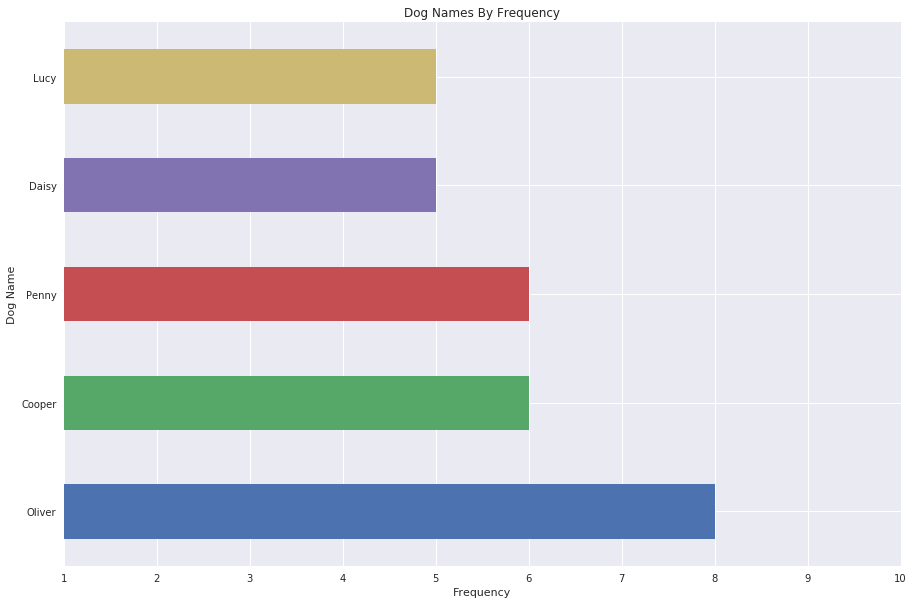

In [543]:
# Plot the top 5 Dog names by frequency
plt.figure(figsize=(15, 10))
dog_names = df_merged_tweets.name.value_counts().nlargest(5).plot(kind = 'barh');
dog_names.set_title('Dog Names By Frequency');
dog_names.set_xlabel('Frequency');
dog_names.set_ylabel('Dog Name');
dog_names.set_xlim(1, 10);

In [544]:
# Dog breed with highest numerator
df_merged_tweets.groupby('p1').rating_numerator.mean().nlargest(5)

p1
clumber                   27.0
Afghan_hound              13.0
Saluki                    13.0
curly-coated_retriever    13.0
Border_terrier            12.5
Name: rating_numerator, dtype: float64

#### Insight
* Clumber breed has hight numeric rating of 27 and seems popular as there is a wide margin between this and the second highest favored breeds.

In [545]:
df_merged_tweets.rating_numerator.describe()

count    657.000000
mean      11.130898
std        1.758578
min        2.000000
25%       10.000000
50%       11.000000
75%       12.000000
max       27.000000
Name: rating_numerator, dtype: float64

#### Insight
* The mean of rating numerator is 12.137.  On Average most dogs have a value between 10 and 12. (corresponding 1st quartile and 3rd quartile values).

In [546]:
# Top p1 Dog breed predictions
df_merged_tweets.p1.value_counts().nlargest(5)

golden_retriever      76
Pembroke              52
Labrador_retriever    43
Chihuahua             34
pug                   31
Name: p1, dtype: int64

#### Insight
* Golden Retriever is favored in most predictions 

In [547]:
# mean confidence of p1 predictions are
df_merged_tweets.p1_conf.mean()

0.78769214916286145

#### Insight
* There is a 78.77% mean confidence that the predictions of the images are correct

In [548]:
#Convert tht timestamp column to date_teim format
df_merged_tweets['timestamp'] = pd.to_datetime(master_clean['timestamp'])

In [550]:
#Calculate retweena and favorite counts on weekly basis
retweet_samp = df_merged_tweets.resample('W', on='timestamp').mean()['retweet_count']
favorite_samp = df_merged_tweets.resample('W', on='timestamp').mean()['favorite_count']

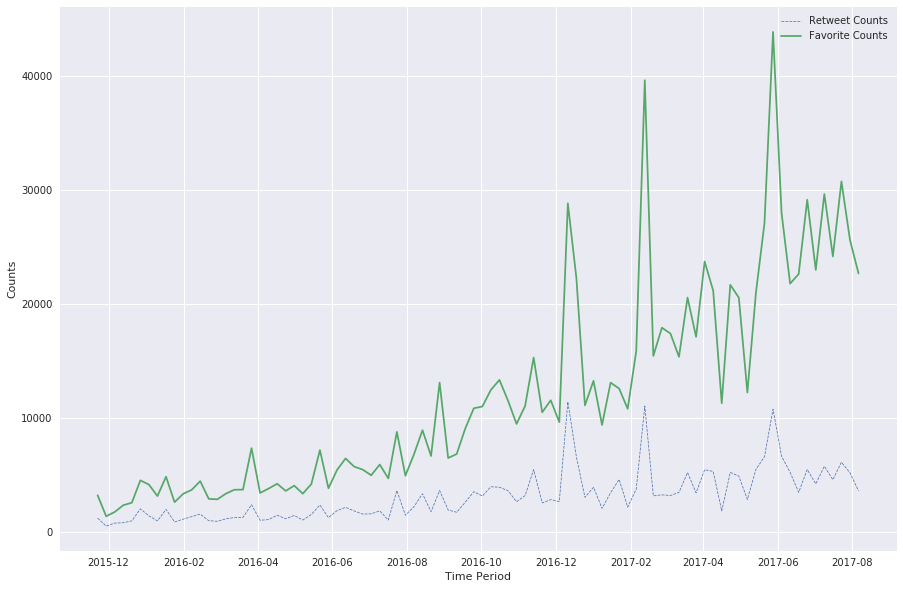

In [552]:
#Plot the above counts
sns.set(rc={'figure.figsize':(15, 10)})
fig, ax = plt.subplots()
ax.plot(retweet_samp, marker='+', linestyle='dashed', lw=0.75, label='Retweet Counts')
ax.plot(favorite_samp, marker='+', markersize=3,  linestyle='solid', label='Favorite Counts')
ax.set_ylabel('Counts')
ax.set_xlabel('Time Period')
ax.legend()

#### Insight
Retweet count has close relation to Favorite count as they seem to follow similar patterns on the graph and around June, 2017 most people retweeted.

In [553]:
# Compute average rating per dog stage
avg_dog_class = (df_merged_tweets.groupby('dog_class')['rating_numerator'].mean()/10).reset_index()
avg_dog_class

,dog_class,rating_numerator
0,doggo,1.215000
1,floofer,1.200000
2,pupper,1.104615
3,puppo,1.218182


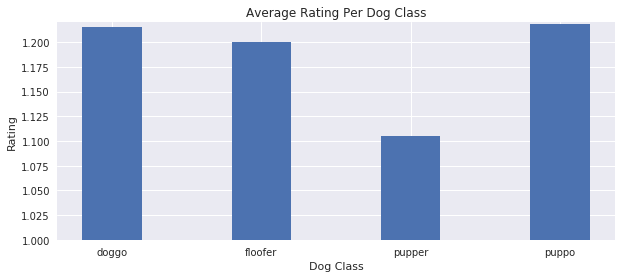

In [564]:
# visualization
loc = np.arange(len(avg_dog_class['dog_class'])) * 2
plt.bar(loc, avg_dog_class['rating_numerator'])
plt.ylabel('Rating') 
plt.ylim(bottom=1.0, top=1.22)
plt.xlabel('Dog Class')
plt.xticks(loc, avg_dog_class['dog_class'] )
plt.title('Average Rating Per Dog Class')
plt.rcParams["figure.figsize"] = (10, 4);

#### Insight
Pupper seem to be least Rated 